# Exercise 1: Company Data

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [78]:
df_c=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 11 Desicion Tree/Company_Data.csv')
df_c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [79]:
df_c.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [80]:
df_c['Sales']=pd.Categorical(df_c.Sales)

In [81]:
df_c.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
dtype: object

In [82]:
df_c.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [83]:
df_c[df_c.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [84]:
df_c['Sales'].unique()

C:\Users\Megha\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Megha\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[9.50, 11.22, 10.06, 7.40, 4.15, ..., 6.10, 5.57, 5.35, 6.14, 9.71]
Length: 336
Categories (336, float64): [9.50, 11.22, 10.06, 7.40, ..., 5.57, 5.35, 6.14, 9.71]

In [85]:
sorted(df_c['Sales'].unique())

[0.0,
 0.16,
 0.37,
 0.53,
 0.91,
 1.42,
 1.82,
 2.05,
 2.07,
 2.23,
 2.34,
 2.52,
 2.66,
 2.67,
 2.86,
 2.93,
 2.99,
 3.02,
 3.07,
 3.13,
 3.15,
 3.24,
 3.42,
 3.45,
 3.47,
 3.58,
 3.62,
 3.63,
 3.67,
 3.72,
 3.89,
 3.9,
 3.91,
 3.98,
 4.1,
 4.11,
 4.12,
 4.15,
 4.16,
 4.17,
 4.19,
 4.2,
 4.21,
 4.34,
 4.36,
 4.38,
 4.42,
 4.43,
 4.47,
 4.53,
 4.55,
 4.56,
 4.62,
 4.67,
 4.68,
 4.69,
 4.74,
 4.78,
 4.81,
 4.83,
 4.88,
 4.9,
 4.94,
 4.95,
 4.96,
 4.97,
 4.99,
 5.01,
 5.04,
 5.05,
 5.07,
 5.08,
 5.12,
 5.16,
 5.17,
 5.21,
 5.25,
 5.27,
 5.28,
 5.3,
 5.31,
 5.32,
 5.33,
 5.35,
 5.36,
 5.4,
 5.42,
 5.47,
 5.52,
 5.53,
 5.55,
 5.56,
 5.57,
 5.58,
 5.61,
 5.64,
 5.68,
 5.71,
 5.73,
 5.74,
 5.81,
 5.83,
 5.86,
 5.87,
 5.9,
 5.93,
 5.94,
 5.97,
 5.98,
 5.99,
 6.01,
 6.03,
 6.1,
 6.11,
 6.14,
 6.15,
 6.18,
 6.2,
 6.23,
 6.37,
 6.38,
 6.39,
 6.41,
 6.42,
 6.43,
 6.44,
 6.5,
 6.52,
 6.53,
 6.54,
 6.56,
 6.59,
 6.62,
 6.63,
 6.64,
 6.67,
 6.68,
 6.71,
 6.8,
 6.81,
 6.85,
 6.87,
 6.88,
 6.89,
 6.9

In [86]:
df_c['Sales']=pd.cut(df_c.Sales,bins=[0,6,12,18],labels=['Low','Medium','High'],right=True)

In [87]:
df_c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [88]:
df_c.Sales.value_counts()

Medium    243
Low       129
High       27
Name: Sales, dtype: int64

In [89]:
label_encoder=preprocessing.LabelEncoder()
df_c['ShelveLoc']=label_encoder.fit_transform(df_c.ShelveLoc)

In [90]:
df_c['Urban']=label_encoder.fit_transform(df_c.Urban)

In [91]:
df_c['Sales']=label_encoder.fit_transform(df_c.Sales)

In [92]:
df_c['US']=label_encoder.fit_transform(df_c.US)

In [107]:
df_c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [109]:
df_c.Sales.value_counts()

2    243
1    129
0     27
3      1
Name: Sales, dtype: int64

In [93]:
df_c.ShelveLoc

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [94]:
df_c.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [95]:
Y=df_c['Sales']
Y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [96]:
X=df_c.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [97]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

In [98]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
114,122,87,9,17,106,2,65,13,1,1
25,139,32,0,176,82,1,54,11,0,0
99,121,47,3,220,107,0,56,16,0,1
90,115,22,0,491,103,2,64,11,0,0
271,111,56,0,504,110,2,62,16,1,0
...,...,...,...,...,...,...,...,...,...,...
132,125,87,9,232,136,1,72,10,1,1
289,143,77,25,448,156,2,43,17,1,1
109,115,65,0,217,90,2,60,17,0,0
395,138,108,17,203,128,1,33,14,1,1


In [99]:
y_train

114    2
25     0
99     1
90     1
271    1
      ..
132    2
289    2
109    2
395    0
176    1
Name: Sales, Length: 280, dtype: int32

In [106]:
y_train.value_counts()

2    172
1     88
0     19
3      1
Name: Sales, dtype: int64

In [100]:
model_E=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
model_E.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(465.0, 792.75, 'X[5] <= 0.5\nentropy = 1.249\nsamples = 280\nvalue = [19, 88, 172, 1]'),
 Text(232.5, 566.25, 'X[4] <= 102.0\nentropy = 0.944\nsamples = 72\nvalue = [0, 46, 26, 0]'),
 Text(116.25, 339.75, 'X[0] <= 116.5\nentropy = 0.773\nsamples = 22\nvalue = [0, 5, 17, 0]'),
 Text(58.125, 113.25, 'entropy = 0.994\nsamples = 11\nvalue = [0, 5, 6, 0]'),
 Text(174.375, 113.25, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]'),
 Text(348.75, 339.75, 'X[0] <= 151.0\nentropy = 0.68\nsamples = 50\nvalue = [0, 41, 9, 0]'),
 Text(290.625, 113.25, 'entropy = 0.551\nsamples = 47\nvalue = [0, 41, 6, 0]'),
 Text(406.875, 113.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(697.5, 566.25, 'X[5] <= 1.5\nentropy = 1.177\nsamples = 208\nvalue = [19, 42, 146, 1]'),
 Text(581.25, 339.75, 'X[6] <= 62.5\nentropy = 0.933\nsamples = 56\nvalue = [14, 1, 41, 0]'),
 Text(523.125, 113.25, 'entropy = 0.918\nsamples = 42\nvalue = [14, 0, 28, 0]'),
 Text(639.375, 113.25, 'entropy = 0.371\ns

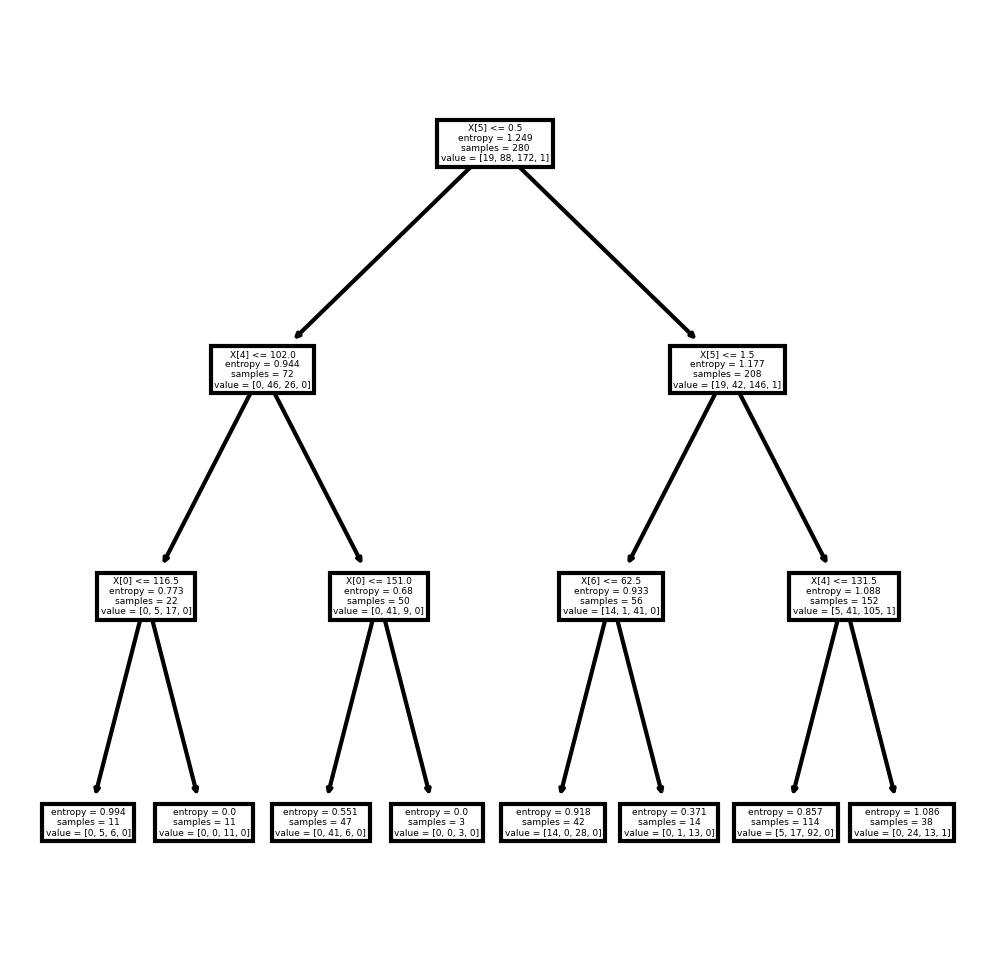

In [103]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model_E)

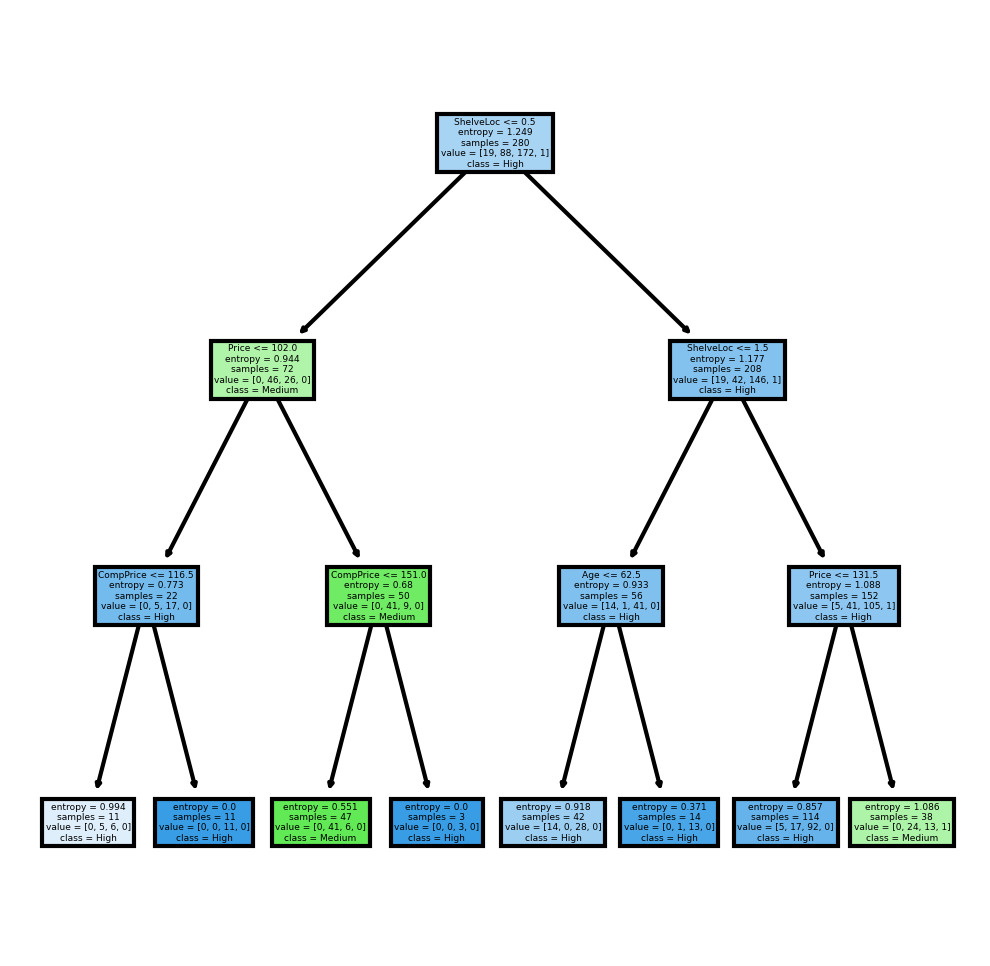

In [104]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model_E,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [105]:
#Predicting on test data
#High==> 0
#Medium==>2
#Low==>1
preds = model_E.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

2    93
1    27
dtype: int64

In [110]:
preds

array([1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1])

In [111]:
pd.crosstab(y_test,preds)

col_0,1,2
Sales,,
0,0,8
1,19,22
2,8,63


In [112]:
#accuracy
np.mean(preds==y_test)

0.6833333333333333

In [116]:
model_G=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [117]:
model_G.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [118]:
preds=model_G.predict(x_test)

In [121]:
preds

array([1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1])

In [122]:
pd.crosstab(y_test,preds)

col_0,1,2
Sales,,
0,0,8
1,21,20
2,13,58


In [119]:
#accuracy
np.mean(preds==y_test)

0.6583333333333333

# Exercise 2: Fraud check

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [169]:
df_f=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 11 Desicion Tree/Fraud_check.csv')
df_f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [170]:
df_f.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [171]:
sorted(df_f['Taxable.Income'].unique())

[10003,
 10150,
 10163,
 10329,
 10348,
 10379,
 10455,
 10735,
 10870,
 10900,
 10933,
 10987,
 11784,
 11794,
 11804,
 11865,
 12011,
 12072,
 12083,
 12453,
 12470,
 12514,
 12659,
 12682,
 12810,
 13068,
 13571,
 13747,
 14300,
 14310,
 14326,
 14398,
 14422,
 14912,
 15296,
 15491,
 15532,
 15627,
 15673,
 15710,
 15853,
 16082,
 16264,
 16316,
 16320,
 16690,
 16992,
 17183,
 17440,
 17783,
 17957,
 17962,
 18032,
 18192,
 18199,
 18572,
 18888,
 19060,
 19169,
 19184,
 19272,
 19649,
 19925,
 20109,
 20309,
 20391,
 20604,
 20719,
 20851,
 21016,
 21337,
 21696,
 21917,
 21945,
 21966,
 22054,
 22159,
 22187,
 22258,
 22773,
 23075,
 23480,
 23855,
 23884,
 24215,
 24347,
 24370,
 24541,
 24557,
 24987,
 25062,
 25222,
 25766,
 26094,
 26101,
 26128,
 26372,
 26494,
 26679,
 26741,
 26783,
 26793,
 26972,
 27081,
 27143,
 27394,
 27520,
 27684,
 27698,
 27877,
 28449,
 28496,
 28707,
 28764,
 28904,
 29046,
 29222,
 29236,
 29385,
 29543,
 29607,
 29732,
 29916,
 29944,
 30167,


In [172]:
df_f['Taxable.Income']=pd.cut(df_f['Taxable.Income'],bins=[10000,30000,100000],labels=['Risky','Good'],right=True)

In [173]:
df_f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [174]:
df_f['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [175]:
df_f['Taxable.Income']=label_encoder.fit_transform(df_f['Taxable.Income'])
df_f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [176]:
df_f['Undergrad']=label_encoder.fit_transform(df_f['Undergrad'])
df_f['Marital.Status']=label_encoder.fit_transform(df_f['Marital.Status'])
df_f['Urban']=label_encoder.fit_transform(df_f['Urban'])
df_f

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [177]:
#Undergard
#No==>1
#Yes==>0
#Marital status
#single==>2
#divorced==>0
#married-->1
#Urban
#Yes==>1
#No==>0

In [178]:
df_f['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [179]:
#Good==>0
#Risky==>1

In [180]:
y=df_f['Taxable.Income']

In [181]:
x=df_f.drop('Taxable.Income',axis=1)

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [183]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
325,0,2,25779,16,1
553,0,2,26884,13,1
582,1,1,32907,12,1
488,1,2,76718,10,1
496,1,0,59382,5,1
...,...,...,...,...,...
218,0,1,38091,19,0
223,1,1,192297,17,1
271,0,2,183682,20,0
474,1,0,80729,0,0


In [184]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
493,0,1,103226,29,0
172,0,1,52819,23,1
352,0,0,72115,16,1
506,0,2,111105,8,1
595,1,0,39492,7,1
...,...,...,...,...,...
508,0,2,195357,19,0
476,0,2,183057,7,1
475,0,2,36081,12,1
235,0,0,87541,9,0


In [185]:
y_train

325    0
553    0
582    0
488    0
496    0
      ..
218    0
223    0
271    0
474    0
355    0
Name: Taxable.Income, Length: 420, dtype: int32

In [186]:
y_test

493    1
172    1
352    1
506    1
595    0
      ..
508    0
476    0
475    0
235    0
89     1
Name: Taxable.Income, Length: 180, dtype: int32

In [187]:
model_e=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [188]:
model_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(125.55000000000001, 190.26, 'X[3] <= 0.5\nentropy = 0.731\nsamples = 420\nvalue = [334, 86]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(167.4, 135.9, 'X[2] <= 31266.5\nentropy = 0.741\nsamples = 410\nvalue = [324, 86]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 20.0\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 31378.5\nentropy = 0.752\nsamples = 394\nvalue = [309, 85]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.749\nsamples = 393\nvalue = [309, 84]')]

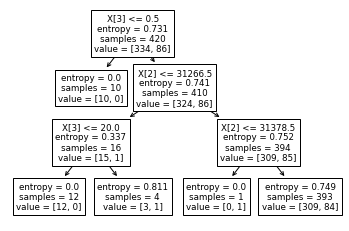

In [189]:
fig, axes=plt.subplots(nrows=1, ncols=1)
tree.plot_tree(model_e)

[Text(348.75, 792.75, 'Work.Experience <= 0.5\nentropy = 0.731\nsamples = 420\nvalue = [334, 86]\nclass = Good'),
 Text(232.5, 566.25, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Good'),
 Text(465.0, 566.25, 'City.Population <= 31266.5\nentropy = 0.741\nsamples = 410\nvalue = [324, 86]\nclass = Good'),
 Text(232.5, 339.75, 'Work.Experience <= 20.0\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]\nclass = Good'),
 Text(116.25, 113.25, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Good'),
 Text(348.75, 113.25, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Good'),
 Text(697.5, 339.75, 'City.Population <= 31378.5\nentropy = 0.752\nsamples = 394\nvalue = [309, 85]\nclass = Good'),
 Text(581.25, 113.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risk'),
 Text(813.75, 113.25, 'entropy = 0.749\nsamples = 393\nvalue = [309, 84]\nclass = Good')]

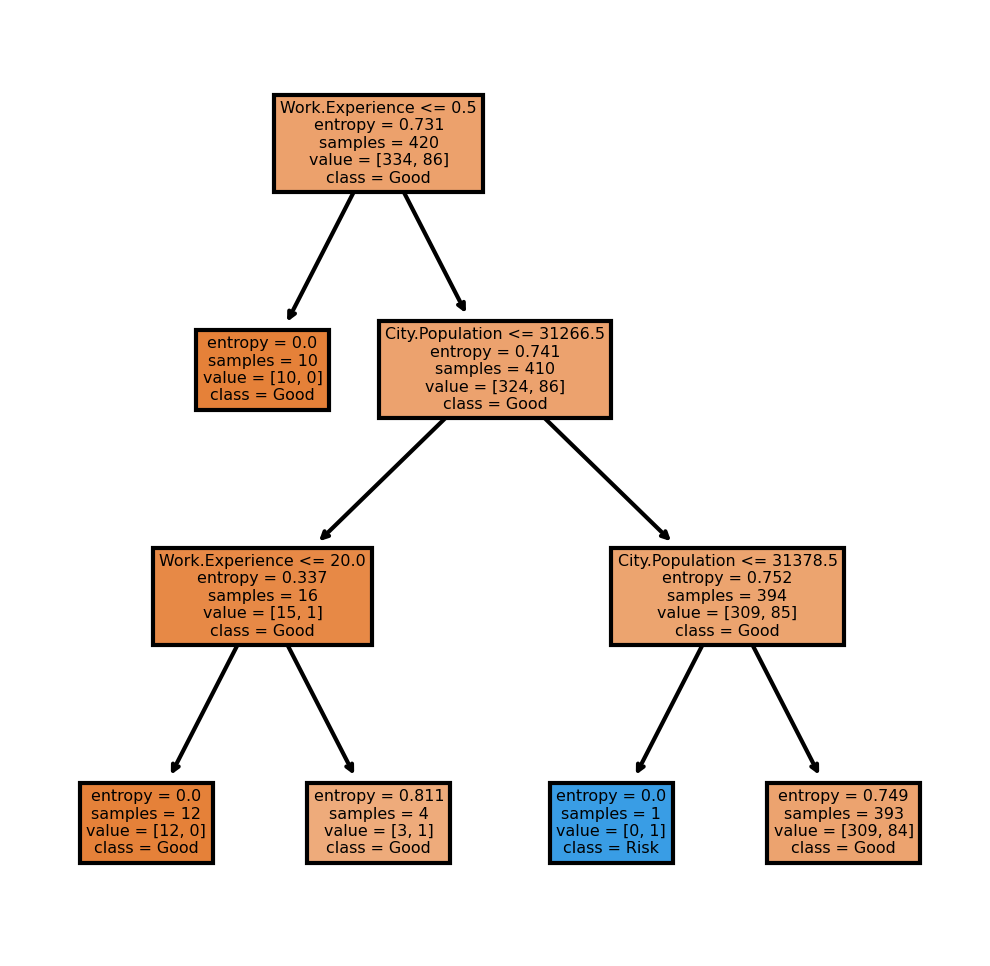

In [191]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good','Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_e,feature_names=fn,class_names=cn,filled=True)

In [192]:
preds=model_e.predict(x_test)
pd.Series(preds).value_counts()

0    180
dtype: int64

In [193]:
pd.crosstab(y_test,preds)

col_0,0
Taxable.Income,
0,142
1,38


In [194]:
#accuracy
np.mean(preds==y_test)

0.7888888888888889

In [195]:
model_c=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [196]:
model_c.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [197]:
preds=model_c.predict(x_test)

In [198]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [200]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,135,7
1,36,2


In [199]:
#accuracy
np.mean(preds==y_test)

0.7611111111111111